<a href="https://colab.research.google.com/github/MiniRedTrout/Integration/blob/main/Num7_Integral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Задание №7. Вычисление определённого интеграла**

   f(x) = 0.5 cos(2x) exp(2x/5) + 2.4 sin(1.5x) exp(−6x) + 6x ,


a = 1.1, b = 2.5, α = 2/5, β = 0;

In [3]:

import math
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

In [4]:
a = 1.1
b = 2.5
alpha = 0.4
beta = 0

def f(x):#Вычисляю функцию
  return 0.5*np.cos(2*x)*np.exp(2*x/5)+2.4*np.sin(1.5*x)*np.exp(-6*x)+6*x
x = sp.Symbol('x')
result = sp.integrate(sp.cos(2*x)*0.5*sp.exp(2*x/5)+2.4*sp.sin(1.5*x)*sp.exp(-6*x)+6*x,(x,a,b))
print(f"Интеграл: {result}")

Интеграл: 14.2731409024335


In [5]:
def abs_metr(test_result):    #Абсолютная погрешность
  return (abs(result - test_result))

In [6]:
x = np.linspace(a,b,1000)
fig = go.Figure()
fig.add_trace(go.Scatter(x=x,y=f(x), name='f(x)=0.5*cos(2x)*e^(0.4x)+2.4*sin(1.5x)*e^(-6x)+6x', marker=dict(color='LightSkyBlue', size=40, line=dict(color='MediumPurple', width=30))))
fig.update_layout(title='f(x) plot', xaxis_title='x', yaxis_title='y')
fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}")

# **Часть №1: Квадратурные формулы Ньютона-Котеса и Гаусса**

# 1.1

**Реализовать методы вычисления определённого интеграла с использованием
составных квадратурных формул: средних и левых прямоугольников, трапеции, Симпсона.**

In [7]:
print("Метод средних прямоугольников")
#
def middle_rectangle(a,b,n):
    h = (b-a)/n
    x = a + h * (np.arange(n) + 0.5)
    return np.sum(f(x)) * h
print(f"Интеграл: {middle_rectangle(a,b,1000)}")

Метод средних прямоугольников
Интеграл: 14.273140557892392


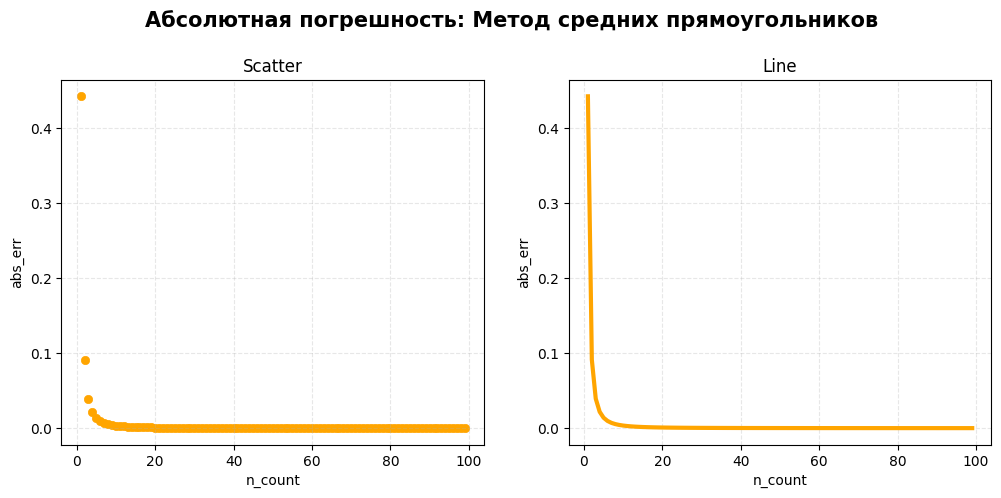

In [8]:
arr1 = [abs_metr(middle_rectangle(a,b,i)) for i in range(1,100)]
fig, axes = plt.subplots(figsize=(12,5), ncols=2)

axes[0].scatter(x=range(1,100), y=arr1,color='orange',linewidth=0.5)
axes[0].set_title('Scatter')
axes[0].set_xlabel('n_count')
axes[0].set_ylabel('abs_err')
axes[1].plot(range(1,100), arr1,color='orange',linewidth=3)
axes[1].set_title('Line')
axes[1].set_xlabel('n_count')
axes[1].set_ylabel('abs_err')
plt.suptitle('Абсолютная погрешность: Метод средних прямоугольников',fontweight='bold',fontsize=15)
axes[0].grid(True, alpha=0.3, linestyle='--')
axes[1].grid(True, alpha=0.3, linestyle='--')
plt.subplots_adjust(top=0.84)

In [9]:
print("Метод левых прямоугольников")
def left_rectangle(a,b,n):
  h = (b-a)/n
  x = a + h * (np.arange(n))
  return np.sum(f(x)) * h
print(f"Интеграл: {left_rectangle(a,b,1000)}")

Метод левых прямоугольников
Интеграл: 14.266674174769154


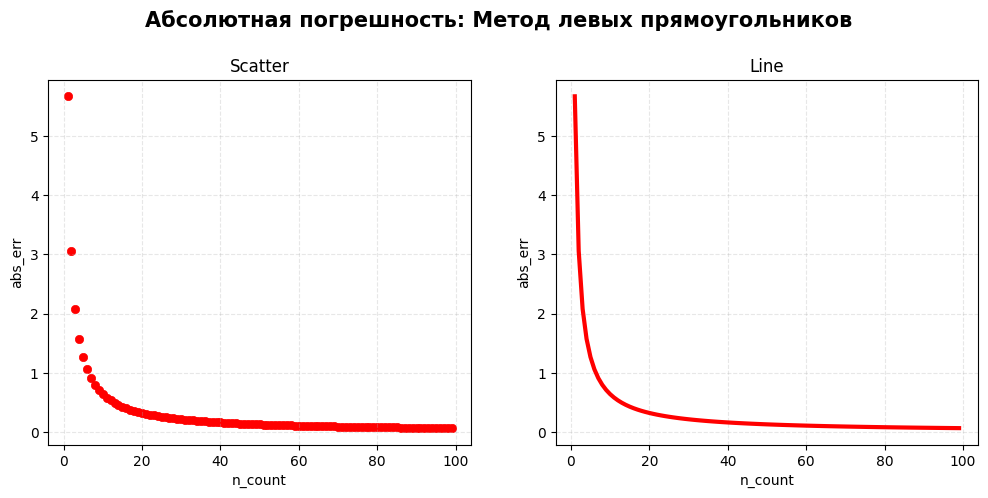

In [10]:
arr2 = [abs_metr(left_rectangle(a,b,i)) for i in range(1,100)]
fig, axes = plt.subplots(figsize=(12,5), ncols=2)

axes[0].scatter(x=range(1,100), y=arr2,color='red',linewidth=0.5)
axes[0].set_title('Scatter')
axes[0].set_xlabel('n_count')
axes[0].set_ylabel('abs_err')
axes[1].plot(range(1,100), arr2,color='red',linewidth=3)
axes[1].set_title('Line')
axes[1].set_xlabel('n_count')
axes[1].set_ylabel('abs_err')
plt.suptitle('Абсолютная погрешность: Метод левых прямоугольников',fontweight='bold',fontsize=15)
axes[0].grid(True, alpha=0.3, linestyle='--')
axes[1].grid(True, alpha=0.3, linestyle='--')
plt.subplots_adjust(top=0.84)

In [11]:
print("Метод трапеции")
def trap(a,b,n):
  h = (b-a)/n
  x = np.linspace(a, b, n + 1)
  return (f(a)+f(b)+2*np.sum(f(x)))*h/2
print(f"Интеграл: {trap(a,b,1000)}")

Метод трапеции
Интеграл: 14.303286260117403


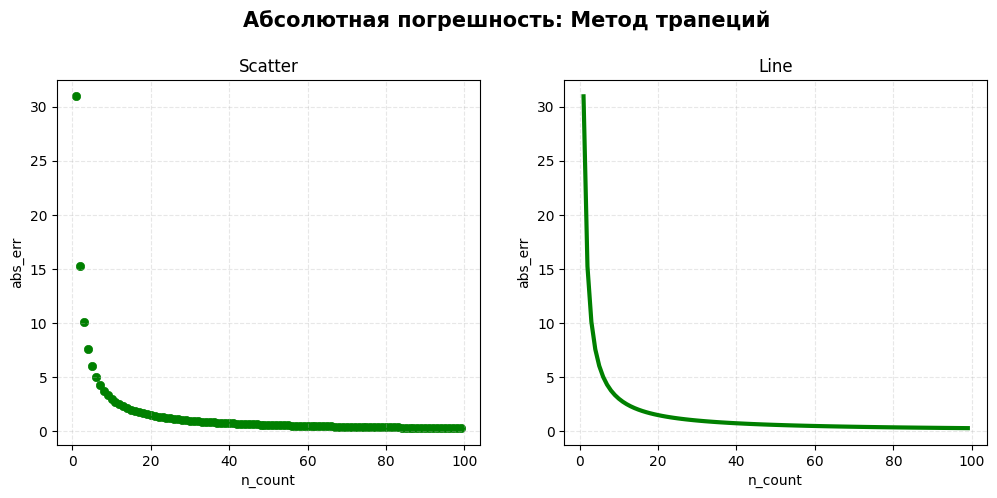

In [12]:
arr3 = [abs_metr(trap(a,b,i)) for i in range(1,100)]
fig, axes = plt.subplots(figsize=(12,5), ncols=2)

axes[0].scatter(x=range(1,100), y=arr3,color='green',linewidth=0.5)
axes[0].set_title('Scatter')
axes[0].set_xlabel('n_count')
axes[0].set_ylabel('abs_err')
axes[1].plot(range(1,100), arr3,color='green',linewidth=3)
axes[1].set_title('Line')
axes[1].set_xlabel('n_count')
axes[1].set_ylabel('abs_err')
plt.suptitle('Абсолютная погрешность: Метод трапеций',fontweight='bold',fontsize=15)
axes[0].grid(True, alpha=0.3, linestyle='--')
axes[1].grid(True, alpha=0.3, linestyle='--')
plt.subplots_adjust(top=0.84)

In [13]:
print("Метод Симпсона")
def sympson(a,b,n):
  h = (b-a)/n
  x = np.linspace(a,b,n+1)
  x1 = x[1:-1:2]
  x2 = x[2:-1:2]
  return h/3 * (f(a) + f(b) + 2*np.sum(f(x2))+4*np.sum(f(x1)))
print(f"Интеграл: {sympson(a,b,1000)}")

Метод Симпсона
Интеграл: 14.27314090243319


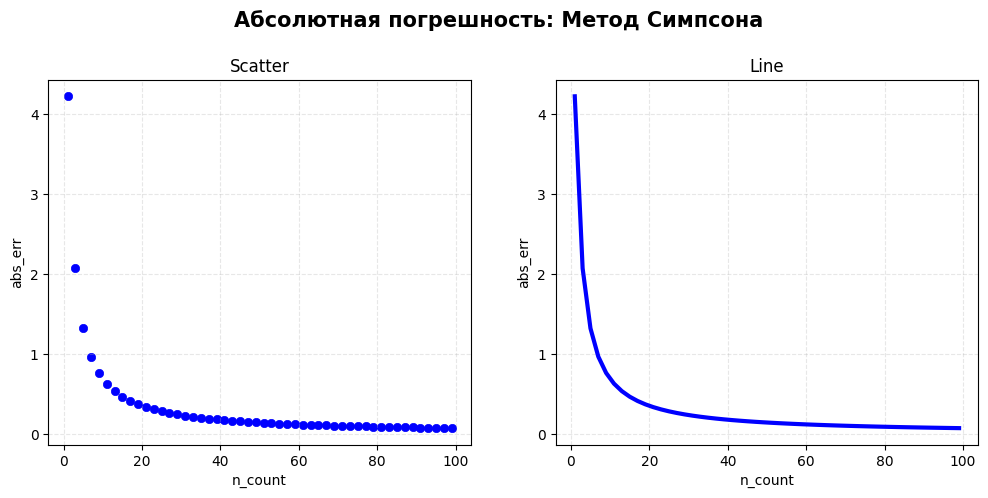

In [14]:
arr4 = [abs_metr(sympson(a,b,i)) for i in range(1,100,2)]
fig, axes = plt.subplots(figsize=(12,5), ncols=2)

axes[0].scatter(x=range(1,100,2), y=arr4,color='blue',linewidth=0.5)
axes[0].set_title('Scatter')
axes[0].set_xlabel('n_count')
axes[0].set_ylabel('abs_err')
axes[1].plot(range(1,100,2), arr4,color='blue',linewidth=3)
axes[1].set_title('Line')
axes[1].set_xlabel('n_count')
axes[1].set_ylabel('abs_err')
plt.suptitle('Абсолютная погрешность: Метод Симпсона',fontweight='bold',fontsize=15)
axes[0].grid(True, alpha=0.3, linestyle='--')
axes[1].grid(True, alpha=0.3, linestyle='--')
plt.subplots_adjust(top=0.84)

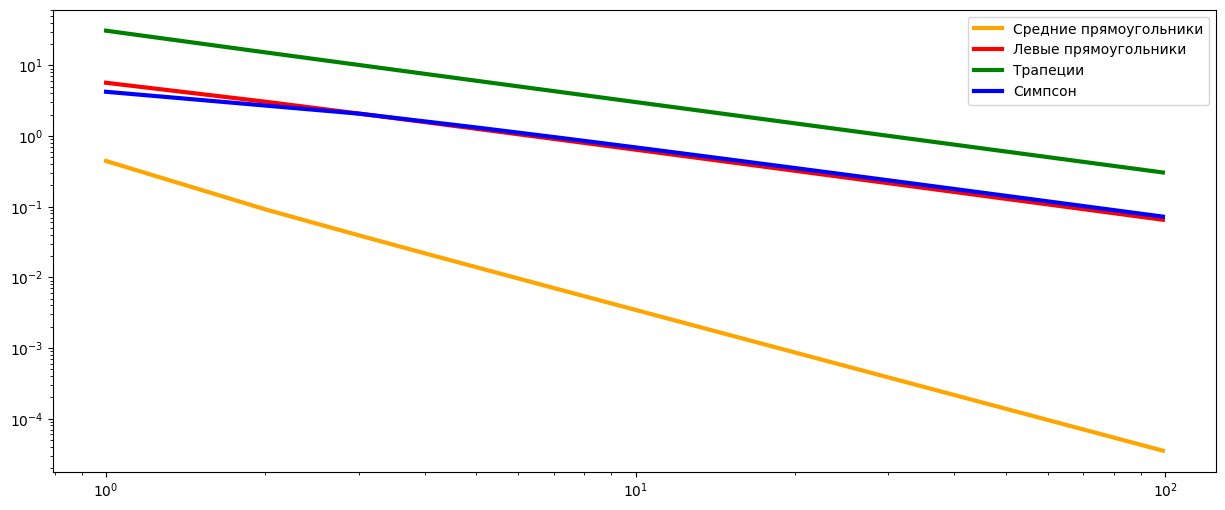

In [15]:
fig = plt.figure(figsize=(15,6))
plt.loglog(np.arange(1,100),arr1, color='orange',linewidth=3,label='Средние прямоугольники')
plt.loglog(range(1,100),arr2,color='red',linewidth=3,label='Левые прямоугольники')
plt.loglog(range(1,100),arr3,color='green',linewidth=3,label='Трапеции')
plt.loglog(range(1,100,2),arr4,color='blue',linewidth=3,label='Симпсон')
plt.legend()

# 1.2

**Реализовать методы вычисления определённого интеграла с использованием составных квадратурных формул на базе 3x точечных формул Ньютона-Кот(е)са и Гаусса.**

В качестве подынтегральной функции взять функцию F(x) = p(𝑥)*f(x), где
f(x) и p(x)=(x−a^(−𝛼)*(b−x)^(−𝛽)

: J(F)=|(F(x)dx = |(f(x)/((x-a)^𝛼*(b-x)^𝛽)

Примечание: узлы каждой малой 3-х-точечной квадратурной формулы Гаусса находить с помощью формул Кардано.
a = 1.1, b = 2.5, α = 2/5, β = 0;

In [16]:
#Вес
def p(x):
  return 1/((x-a)**(alpha))

In [17]:
from scipy.integrate import quad
def f2(x):#Вычисляю функцию
    numerator = (0.5 * np.cos(2*x) * np.exp(2*x/5) +
                2.4 * np.sin(1.5*x) * np.exp(-6*x) +
                6*x)
    denominator = np.abs(x - 1.1)**0.4
    return numerator / denominator * np.sign(x - 1.1)
result,err = quad(f2,a,b,points=[1.1], limit=1000, full_output=0)
print(f"Интеграл: {result:.10f}")

Интеграл: 18.6029478573


In [18]:
x = np.linspace(a+0.00001,b,1000)
fig = go.Figure()
fig.add_trace(go.Scatter(x=x,y=f2(x), name='f(x)=(0.5*cos(2x)*e^(0.4x)+2.4*sin(1.5x)*e^(-6x)+6x)*P(x)', marker=dict(color='LightSkyBlue', size=40, line=dict(color='MediumPurple', width=30))))
fig.update_layout(title='f(x) plot', xaxis_title='x', yaxis_title='y')
fig.update_traces(hoverinfo="all", hovertemplate="Аргумент: %{x}<br>Функция: %{y}")

**1. Составная квадратурная формула Гаусса (3 точки)**

In [19]:
#Решение системы уравнений Гауссом
def gaussian_elimination(A, b):
    n = A.shape[0]

    Ab = np.hstack([A.astype(float), b.reshape(-1, 1).astype(float)])

    for i in range(n):
        max_row = np.argmax(np.abs(Ab[i:, i])) + i
        if max_row != i:
            Ab[[i, max_row]] = Ab[[max_row, i]]

        pivot = Ab[i, i]
        Ab[i] = Ab[i] / pivot

        for j in range(i + 1, n):
            factor = Ab[j, i]
            Ab[j] = Ab[j] - factor * Ab[i]
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = Ab[i, n] - np.dot(Ab[i, i+1:n], x[i+1:n])

    return x

In [20]:
#Моменты вычисляю
def moment(a_s,b_s,n):
  mu = np.zeros(2*n)
  for i in range(2*n):
      integrand = lambda x: p(x) * x**i
      mu[i], _ = quad(integrand, a_s, b_s)
  return mu

In [21]:
#Корни методом Кардано
def cardano_method(coeffs):
    a, b, c, d = coeffs

    p = (3*a*c - b**2) / (3*a**2)
    q = (2*b**3 - 9*a*b*c + 27*a**2*d) / (27*a**3)

    discriminant = (q/2)**2 + (p/3)**3

    if discriminant > 0:
        u = np.cbrt(-q/2 + np.sqrt(discriminant))
        v = np.cbrt(-q/2 - np.sqrt(discriminant))
        x1 = u + v
        x2 = -(u + v)/2 + (u - v)*1j*np.sqrt(3)/2
        x3 = -(u + v)/2 - (u - v)*1j*np.sqrt(3)/2
    else:
        phi = np.arccos(-q/2 * np.sqrt(-27/(p**3))) if p != 0 else np.pi/2
        x1 = 2 * np.sqrt(-p/3) * np.cos(phi/3)
        x2 = 2 * np.sqrt(-p/3) * np.cos((phi + 2*np.pi)/3)
        x3 = 2 * np.sqrt(-p/3) * np.cos((phi + 4*np.pi)/3)

    roots = np.array([x1, x2, x3]) - b/(3*a)
    return roots

In [22]:
#Метод Гаусса
def gauss_form(a_s,b_s,n):
    mu = moment(a_s,b_s,n)
    A = np.zeros((n,n))
    be = np.zeros(n)
    for s in range(n):
        A[s, :] = [mu[i + s] for i in range(n)]
        be[s] = -mu[n + s]
    a_coeffs = gaussian_elimination(A, be)
    a_coeffs = a_coeffs[::-1]
    poly_coeffs = np.concatenate(([1], a_coeffs))
    nodes = cardano_method(poly_coeffs)
    V = np.vander(nodes, N=n, increasing=True)
    A = gaussian_elimination(V.T, mu[:n])

    integral_approximation = np.sum(A * f(nodes))

    return float(integral_approximation)

In [23]:
def composite_gauss(k, n=3):
    h = (b - a) / k
    total_integral = 0.0

    for i in range(k):
        segment_a = a + i * h
        segment_b = a + (i + 1) * h

        segment_integral = gauss_form(segment_a, segment_b, n)
        total_integral += segment_integral

    return total_integral

In [24]:
#Вычисленное значение
composite_gauss(3)


18.60294740281966

**2. Составная квадратурная формула Ньютона-Котса (3 точки)**

In [25]:
def newton_cotes(k):
    h = (b - a) / k
    total_integral = 0.0

    for i in range(1, k + 1):
        z_prev = a + (i - 1) * h
        z_i = a + i * h
        z_mid = (z_prev + z_i) / 2

        mu_0 = ((z_i - a)**(1 - alpha) - (z_prev - a)**(1 - alpha)) / (1 - alpha)
        mu_1 = ((z_i - a)**(2 - alpha) - (z_prev - a)**(2 - alpha)) / (2 - alpha) + a * mu_0
        mu_2 = ((z_i - a)**(3 - alpha) - (z_prev - a)**(3 - alpha)) / (3 - alpha) + 2 * a * mu_1 - a**2 * mu_0

        denominator1 = (z_mid - z_prev) * (z_i - z_prev)
        A1 = (mu_2 - mu_1 * (z_mid + z_i) + mu_0 * z_mid * z_i) / denominator1

        denominator2 = (z_mid - z_prev) * (z_i - z_mid)
        A2 = -(mu_2 - mu_1 * (z_prev + z_i) + mu_0 * z_prev * z_i) / denominator2

        denominator3 = (z_i - z_mid) * (z_i - z_prev)
        A3 = (mu_2 - mu_1 * (z_prev + z_mid) + mu_0 * z_prev * z_mid) / denominator3

        segment_contribution = (A1 * f(z_prev) +
                              A2 * f(z_mid) +
                              A3 * f(z_i))

        total_integral += segment_contribution

    return total_integral


In [26]:
newton_cotes(3)

np.float64(18.601806063458632)

#1.3

**Для каждой квадратурной формулы из пп.1.1-2 представить график зависимости абсолютной погрешности от количества разбиений интервала интегрирования.**

In [27]:
def abs_metr2(new_res):
    return abs(result - new_res)

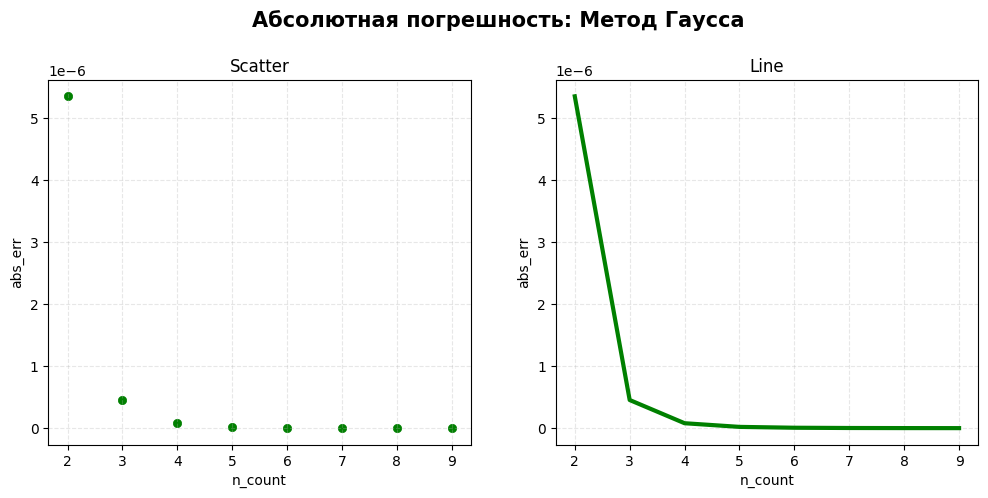

In [28]:
arr5 = [abs_metr2(composite_gauss(i)) for i in range(2,10)]
fig, axes = plt.subplots(figsize=(12,5), ncols=2)

axes[0].scatter(x=range(2,10), y=arr5,color='green',linewidth=0.5)
axes[0].set_title('Scatter')
axes[0].set_xlabel('n_count')
axes[0].set_ylabel('abs_err')
axes[1].plot(range(2,10), arr5,color='green',linewidth=3)
axes[1].set_title('Line')
axes[1].set_xlabel('n_count')
axes[1].set_ylabel('abs_err')
plt.suptitle('Абсолютная погрешность: Метод Гаусса',fontweight='bold',fontsize=15)
axes[0].grid(True, alpha=0.3, linestyle='--')
axes[1].grid(True, alpha=0.3, linestyle='--')
plt.subplots_adjust(top=0.84)

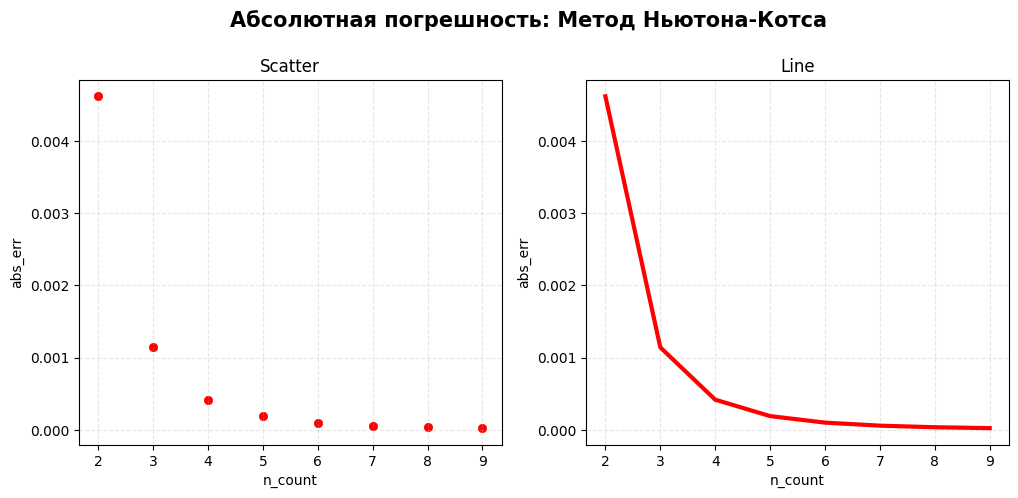

In [29]:
arr6 = [abs_metr2(newton_cotes(i)) for i in range(2,10)]
fig, axes = plt.subplots(figsize=(12,5), ncols=2)

axes[0].scatter(x=range(2,10), y=arr6,color='red',linewidth=0.5)
axes[0].set_title('Scatter')
axes[0].set_xlabel('n_count')
axes[0].set_ylabel('abs_err')
axes[1].plot(range(2,10), arr6,color='red',linewidth=3)
axes[1].set_title('Line')
axes[1].set_xlabel('n_count')
axes[1].set_ylabel('abs_err')
plt.suptitle('Абсолютная погрешность: Метод Ньютона-Котса',fontweight='bold',fontsize=15)
axes[0].grid(True, alpha=0.3, linestyle='--')
axes[1].grid(True, alpha=0.3, linestyle='--')
plt.subplots_adjust(top=0.84)

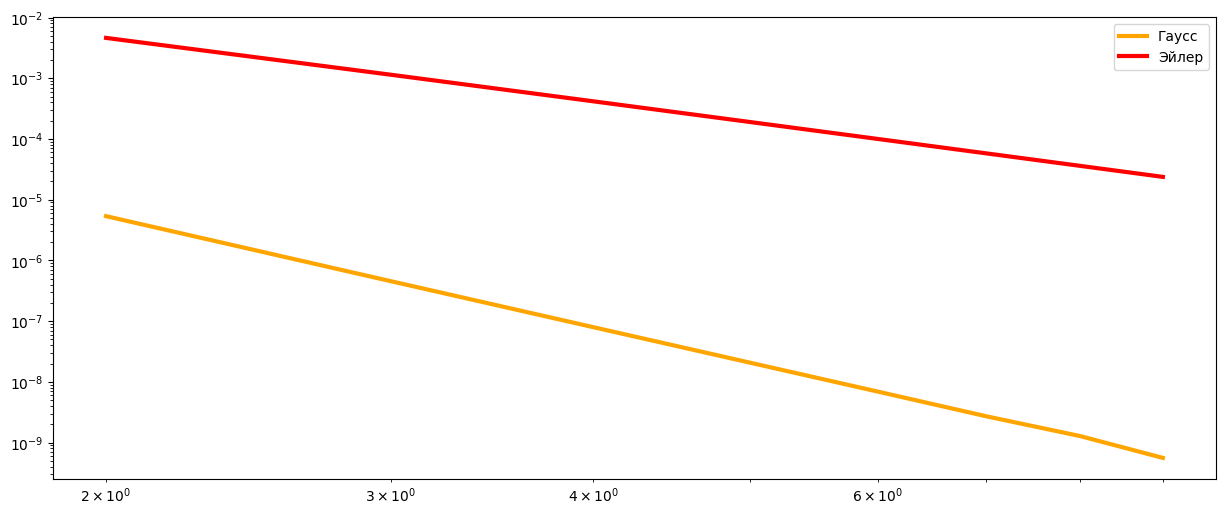

In [30]:
fig = plt.figure(figsize=(15,6))
plt.loglog(np.arange(2,10),arr5, color='orange',linewidth=3,label='Гаусс')
plt.loglog(range(2,10),arr6,color='red',linewidth=3,label='Эйлер')
plt.legend()

# **Часть №2: Методы оценки погрешности составных квадратурных формул**

# 2.1

Вычислить определенный интеграл с заданной точностью 𝜀 = 10−6 c использованием
составной 3-х-точечной квадратурной формулы Ньютона-Кот(е)са. Погрешность
оценивать методом Ричардсона. На каждых последовательных трёх сетках оценивать
скорость сходимости по правилу Эйткена. Указать длину шага ℎ разбиения интервала
интегрирования, при котором была достигнута требуемая точность 𝜀.

In [31]:
from math import factorial

def solve_richardson_system(h_values, S_values, r,m=4):
    n_equations = r + 1
    h_subset = h_values[-n_equations:]
    S_subset = S_values[-n_equations:]

    A = np.ones((n_equations, n_equations))
    b = np.array(S_subset)

    # Заполняем матрицу степенями h
    for i in range(n_equations):
        h = h_subset[i]
        for j in range(1, n_equations):
            power = m + (j - 1)  # m, m+1, ..., m+r-1
            A[i, j] = h ** power

    # Решаем систему
    x = gaussian_elimination(A, b)
    J = x[0]
    C = x[1:]
    return C
def estimate_richardson_error(h_current, C, r, m=4):
    error = 0.0
    for i in range(r):
        power = m + i
        error += abs(C[i] * (h_current ** power))
    return error
def aitken_acceleration(I1, I2, I3):
    """
    Ускорение Эйткена для оценки скорости сходимости
    """
    m = -np.log(abs((I3 - I2) / (I2 - I1))) / np.log(2)
    return m

def adaptive_integration(f, a, b, method, h=0,hop=0,epsilon=1e-6, max_iterations=20):
    n_segments = 6
    h_currents = []
    S_currents = []
    n_currents = [n_segments]
    r = 0
    for iteration in range(max_iterations):
        if h == 0:
            h_current = (b - a) / n_segments
        else:
          h_current = h
          h = 0
          n_currents[0] = int((b - a)//h_current)
          n_segments = int((b - a)//h_current)
        h_currents.append(h_current)
        I_current = method(n_segments)
        S_currents.append(I_current)
        if len(S_currents) >= 2:
            n_prev, h_prev, I_prev = n_currents[-2], h_currents[-2], S_currents[-2]
            C = solve_richardson_system(h_currents, S_currents,r)
            error_estimate = estimate_richardson_error(h_current, C,r)
            if len(S_currents) >= 3:
                n_prev2, h_prev2, I_prev2 = n_currents[-3], h_currents[-3], S_currents[-3]
                n_prev1, h_prev1, I_prev1 = n_currents[-2], h_currents[-2], S_currents[-2]
                m = aitken_acceleration(I_prev2, I_prev1, I_current)
                C = solve_richardson_system(h_currents, S_currents,r)
                error_estimate = estimate_richardson_error(h_current, C,r)
                print(f"{iteration+1:<8} {h_current:<12.2e} {n_segments:<10} {I_current:<15.10f} {error_estimate:<15.2e} {m:<10.4f}")
                if error_estimate < epsilon:
                    print(f"Конечное значение интеграла: {I_current:.10f}")
                    print(f"Оценка погрешности: {error_estimate:.2e}")
                    print(f"Шаг h: {h_current:.2e}")
                    print(f"Количество сегментов: {n_segments}")
                    print(f"Количество итераций: {iteration + 1}")
                    return h_current
            else:
                print(f"{iteration+1:<8} {h_current:<12.2e} {n_segments:<10} {I_current:<15.10f} {error_estimate:<15.2e} {'-':<10}")
        else:
            print(f"{iteration+1:<8} {h_current:<12.2e} {n_segments:<10} {I_current:<15.10f} {'-':<15} {'-':<10}")
        n_segments *= 2
        n_currents.append(n_segments)
        r += 1
        if hop != 0:
          if r == 3:
            return h_current
    return h_current

In [32]:
h = adaptive_integration(f2,a,b,newton_cotes)

1        2.33e-01     6          18.6028478879   -               -         
2        1.17e-01     12         18.6029393214   6.10e-06        -         
3        5.83e-02     24         18.6029471364   7.29e-07        3.5484    
Конечное значение интеграла: 18.6029471364
Оценка погрешности: 7.29e-07
Шаг h: 5.83e-02
Количество сегментов: 24
Количество итераций: 3


# 2.2

Выполнить всё, что указано в п. 2.1, используя 3-х-точечные формулы Гаусса вместо формул Ньютона-Кот(е)са.

In [33]:
h = adaptive_integration(f2,a,b,composite_gauss)

1        2.33e-01     6          18.6029478504   -               -         
2        1.17e-01     12         18.6029478572   4.53e-10        -         
3        5.83e-02     24         18.6029478573   2.48e-11        6.0265    
Конечное значение интеграла: 18.6029478573
Оценка погрешности: 2.48e-11
Шаг h: 5.83e-02
Количество сегментов: 24
Количество итераций: 3


# 2.3

Проведя вычисления (для одной из построенных квадратурных формул из п.2.1-2) по
трём сеткам с малым числом шагов (например, 1, 2 и 4) и используя оценку скорости
сходимости по Эйткену, выбрать шаг ℎ𝑜. Начать расчет с полученного шага и снова
довести вычисления интеграла до требуемой точности 𝜀. Указать шаг разбиения интервала
интегрирования, при котором достигнута требуемая точность, и сравнить его с шагом,
вычисленным в 2.1 или 2.2 (в зависимости от того, какую квадратурную формулу Вы
выбрали для выполнения задания в п. 2.3).

In [34]:
h0 = adaptive_integration(f2,a,b,newton_cotes, 1, 1)
h_best = adaptive_integration(f2,a,b,newton_cotes,h0)

1        1.00e+00     1          18.5580413762   -               -         
2        7.00e-01     2          18.5983311422   1.27e-02        -         
3        3.50e-01     4          18.6025303225   1.21e-03        3.2622    
1        3.50e-01     4          18.6025303225   -               -         
2        1.75e-01     8          18.6029117860   2.54e-05        -         
3        8.75e-02     16         18.6029447940   3.11e-06        3.5307    
4        4.37e-02     32         18.6029475994   2.98e-07        3.5566    
Конечное значение интеграла: 18.6029475994
Оценка погрешности: 2.98e-07
Шаг h: 4.37e-02
Количество сегментов: 32
Количество итераций: 4


In [38]:
abs(h - h_best)

0.01458333333333333